# Content List
01. Import Libraries
02. Import Data
03. Security Implications
04. Comparing customer behavior in different geographic areas
05. Create an exclusion flag for low-activity customers (less than 5 orders)
06. Create profiling variables 
07. Visualization Section
08. Aggregate max, mean, & min
09. Compare customer profiles with Regions & depts


## 01. Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Import Data

In [2]:
#Import Data

path = r'/Volumes/2020-2021/CareerFoundry/Data Analytics Program/Achievement 4 Immersion/Instacart Basket Analysis'

In [3]:
df=pd.read_pickle(os.path.join(path,path,'02 Data','Prepared Data','ords_prods_customer_merged_4_9.pkl'))

In [4]:
df.shape

(32435059, 35)

In [5]:
df.head()

,order_id,user_id,eval_set,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,First Name,last_name,Gender,STATE,Age,date_joined,number_of_dependents,marital_status,income,_merge
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,prior,1,2,8,NaN,14084,2,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,prior,1,2,8,NaN,12427,3,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,prior,1,2,8,NaN,26088,4,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,prior,1,2,8,NaN,26405,5,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [6]:
#took out first and last name, since it is not needed. Also took out _merge & eval_set since they also were not needed ot reduce the file size
df_2 = df.drop(columns = ['eval_set', 'First Name','last_name', '_merge'])

In [7]:
df_2.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'Busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'spending', 'spending_flag', 'frequency', 'order_frequency_flag',
       'Gender', 'STATE', 'Age', 'date_joined', 'number_of_dependents',
       'marital_status', 'income'],
      dtype='object')

## 03. Security Implications
Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

Customers First and Last name were removed due to potential privacy issues 

## 04. Comparing customer behavior in different geographic areas
The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [8]:
#View all States in 'State' column

df_2['STATE'].value_counts(dropna= False)

Pennsylvania            667738
California              660428
Rhode Island            657662
Georgia                 657092
New Mexico              655188
Arizona                 654553
North Carolina          652329
Oklahoma                652275
Alaska                  649026
Minnesota               648424
Massachusetts           647020
Wyoming                 644927
Virginia                642103
Missouri                641323
Texas                   641051
Colorado                639820
Maine                   639175
North Dakota            638997
Alabama                 638650
Louisiana               638179
Kansas                  638021
Delaware                637477
South Carolina          637423
Oregon                  636966
Arkansas                636737
New York                636707
Nevada                  636697
Montana                 635838
South Dakota            634362
Illinois                633476
Hawaii                  633446
Washington              633445
Mississi

In [9]:
#Create 'Region' column based on 'STATE' column using For-loop

result = []

for value in df_2 ['STATE']:
    if (value == 'Maine' or value=='New Hampshire' or value=='Vermont' or value=='Massachusetts' or value=='Rhode Island' or value=='Connecticut' or value=='New York' or value=='Pennsylvania' or value=='New Jersey'):
        result.append('Northeast')
    elif (value == 'Wisconsin' or value=='Michigan' or value=='Illinois' or value=='Indiana' or value=='Ohio' or value=='North Dakota' or value=='South Dakota' or value=='Nebraska' or value=='Kansas' or value=='Minnesota' or value=='Iowa' or value=='Missouri'):
        result.append('Midwest')
    elif (value == 'Delaware' or value== 'Maryland' or value== 'District of Columbia' or value== 'Virginia' or value== 'West Virginia' or value== 'North Carolina' or value== 'South Carolina' or value== 'Georgia' or value== 'Florida' or value== 'Kentucky' or value== 'Tennessee' or value== 'Mississippi' or value== 'Alabama' or value== 'Oklahoma' or value== 'Texas' or value== 'Arkansas' or value== 'Louisiana'):
        result.append('South')
    elif (value == 'Idaho' or value== 'Montana' or value== 'Wyoming' or value== 'Nevada' or value== 'Utah' or value== 'Colorado' or value== 'Arizona' or value== 'New Mexico' or value== 'Alaska' or value== 'Washington' or value== 'Oregon' or value== 'California' or value== 'Hawaii'):
        result.append('West')
    else:
        result.append('Not Enough Data')

In [10]:
result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'Wes

In [11]:
#Create 'Country_Region' column in df using result

df_2['Country_Region'] = result

In [12]:
#Print frequency of this new column

df_2['Country_Region'].value_counts(dropna=False)

South        10801982
West          8300617
Midwest       7604016
Northeast     5728444
Name: Country_Region, dtype: int64

In [13]:
#Difference in spending habits between the different regions - Crossing Region variable w/ Spending Flag

crosstab = pd.crosstab(df_2['Country_Region'], df_2['spending_flag'], dropna = False)

In [14]:
#Copy crosstab to clipboard to then past in Excel

crosstab.to_clipboard()

In [15]:
crosstab

spending_flag,High Spender,Low Spender
Country_Region,,
Midwest,156084,7447932
Northeast,108258,5620186
South,209863,10592119
West,160440,8140177


The Southern region seems to have the largest amount of High and Low Spenders, however they also have the highest in customer base as well with around 10.8 million. The Northeast is the smallest amount of High and Low Spenders but they also have the fewest amount of customers at 5.7 million.

In [16]:
#Regional stats - Regional Prices

df_2.groupby(['Country_Region']).agg({'prices':['median']})

,prices
,median
Country_Region,
Midwest,7.4
Northeast,7.4
South,7.4
West,7.4


In [17]:
df_2.groupby(['Country_Region']).agg({'prices':['sum']})

,prices
,sum
Country_Region,
Midwest,9.660366e+07
Northeast,6.612620e+07
South,1.316133e+08
West,9.387440e+07


Seems like the midwest has a higher amount that is spent in that region and the West is a close second and even though the South has more spenders, they do have the highest low spenders of the region and spend the lowest amount.

In [18]:
df_2.groupby(['Country_Region']).agg({'order_number':['sum']})

,order_number
,sum
Country_Region,
Midwest,128694200
Northeast,98619337
South,185256906
West,143429570


The South has the highest amount of orders and the Northeast has the least which makes sense since it reflects spenders in both areas accurately.

## 05. Create an exclusion flag for low-activity customers (less than 5 orders)
The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [19]:
#Create 'If' statement using loc() function

df_2.loc[df_2['order_number'] <5,'Activity_Flag'] = 'Low_Activity'

In [20]:
df_2.loc[df_2['order_number'] >= 5,'Activity_Flag'] = 'High_Activity'

In [21]:
#Print frequency of new 'Activity_Flag' column

df_2 ['Activity_Flag'].value_counts(dropna=False)

High_Activity    24437464
Low_Activity      7997595
Name: Activity_Flag, dtype: int64

In [22]:
#Create sample df of only low_activty customers

df_low_activity = df_2[df_2.Activity_Flag == 'Low_Activity']

In [23]:
#Check sample df
df_low_activity.shape

(7997595, 33)

In [24]:
#Export df_low_activity 

df_low_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'df_low_activity_4_10_part1.pkl'))

In [25]:
#Remove 'Low_Activity' customers from df

df_2 = df_2[df_2.Activity_Flag == 'High_Activity']

In [26]:
#check values
df_2['Activity_Flag'].value_counts(dropna= False)

High_Activity    24437464
Name: Activity_Flag, dtype: int64

In [27]:
df_2.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'Busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'spending', 'spending_flag', 'frequency', 'order_frequency_flag',
       'Gender', 'STATE', 'Age', 'date_joined', 'number_of_dependents',
       'marital_status', 'income', 'Country_Region', 'Activity_Flag'],
      dtype='object')

## 06. Create profiling variables 
The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. 
Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 
You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [28]:
#Create a parent status column
df_2 ['Parent_Status']=""

In [29]:
df_2.loc[((df_2['Age'] >= 18) & (df_2['Age'] <= 35) & (df_2['number_of_dependents'] >= 1)), 'Parent_Status'] = 'Young Parent'

In [30]:
df_2.loc[(df ['number_of_dependents'] == 0), 'Parent_Status'] = 'No Dependents'

In [31]:
df_2.loc[(df['Age'] >= 35) & (df_2['Age'] <= 50) & (df_2['number_of_dependents'] >= 1), 'Parent_Status'] = 'Middle Age Parent'

In [32]:
df_2.loc[(df['Age'] >= 50) & (df_2['number_of_dependents'] >= 1), 'Parent_Status'] = 'Older Parent'

In [33]:
df_2['Parent_Status'].value_counts(dropna= False)

Older Parent         9096199
No Dependents        6110908
Young Parent         4882864
Middle Age Parent    4347493
Name: Parent_Status, dtype: int64

In [34]:
# Create 'Income Level' Column
df_2 ['Income Level']=""

In [35]:
df_2.loc[(df_2['income'] < 40000), 'Income Level'] = 'Lower Income'

In [36]:
df_2.loc[(df_2['income'] >= 40000) & (df_2['income'] <= 100000), 'Income Level'] = 'Middle Income'

In [37]:
df_2.loc[(df_2['income'] > 100000), 'Income Level'] = 'Higher Income'

In [38]:
df_2['Income Level'].value_counts(dropna= False)

Middle Income    11960978
Higher Income    11235325
Lower Income      1241161
Name: Income Level, dtype: int64

In [39]:
df_2.head()

,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,STATE,Age,date_joined,number_of_dependents,marital_status,income,Country_Region,Activity_Flag,Parent_Status,Income Level
21,431534,1,5,4,15,28.0,196,1,1,195.0,...,Alabama,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income
22,431534,1,5,4,15,28.0,12427,2,1,12427.0,...,Alabama,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income
23,431534,1,5,4,15,28.0,10258,3,1,10258.0,...,Alabama,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income
24,431534,1,5,4,15,28.0,25133,4,1,25134.0,...,Alabama,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income
25,431534,1,5,4,15,28.0,10326,5,0,10326.0,...,Alabama,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income


In [40]:
#Create pet order flag column

df_2 ['Pet Order Flag']=""

In [41]:
df_2.loc[(df_2['department_id'] == 8), 'Pet Order Flag'] = 1

In [42]:
df_2.loc[(df_2['department_id'] != 8), 'Pet Order Flag'] = 0

In [43]:
df_2['Pet Order Flag'].value_counts(dropna= False)

0    24365353
1       72111
Name: Pet Order Flag, dtype: int64

In [44]:
df_2.head()

,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,Age,date_joined,number_of_dependents,marital_status,income,Country_Region,Activity_Flag,Parent_Status,Income Level,Pet Order Flag
21,431534,1,5,4,15,28.0,196,1,1,195.0,...,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,0
22,431534,1,5,4,15,28.0,12427,2,1,12427.0,...,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,0
23,431534,1,5,4,15,28.0,10258,3,1,10258.0,...,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,0
24,431534,1,5,4,15,28.0,25133,4,1,25134.0,...,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,0
25,431534,1,5,4,15,28.0,10326,5,0,10326.0,...,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,0


In [45]:
# Group by user_id, sum by total num of orders in dept 8 per user_id (Pet Order Flag)

df_2_pet = df_2.groupby('user_id').agg({'Pet Order Flag':'sum'})

In [46]:
# Create Pet Owner column 

df_2_pet['Pet Owner'] =""

In [47]:
# If Pet Order >= 1 then "Pet Owner" (user had 1 or more orders in dept 8)

df_2_pet.loc[(df_2_pet['Pet Order Flag'] >= 1), 'Pet Owner'] = "Pet Owner"

In [48]:
# If user has no orders in dept 8

df_2_pet.loc[(df_2_pet['Pet Order Flag'] == 0), 'Pet Owner'] = "Not Pet Owner"

In [49]:
# Drop Pet Order Flag column

df_2_pet = df_2_pet.drop(columns = ['Pet Order Flag'])

In [50]:
df_2_pet.shape

(162633, 1)

In [51]:
# Left join df (left) with df_grouped (right) to get "Pet Order" for each user_id

df_2 = df_2.merge(df_2_pet, on='user_id', how='left')

In [52]:
df_2['Pet Owner'].value_counts(dropna= False)

Not Pet Owner    21803511
Pet Owner         2633953
Name: Pet Owner, dtype: int64

In [53]:
df_2.head()

,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,date_joined,number_of_dependents,marital_status,income,Country_Region,Activity_Flag,Parent_Status,Income Level,Pet Order Flag,Pet Owner
0,431534,1,5,4,15,28.0,196,1,1,195.0,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,0,Not Pet Owner
1,431534,1,5,4,15,28.0,12427,2,1,12427.0,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,0,Not Pet Owner
2,431534,1,5,4,15,28.0,10258,3,1,10258.0,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,0,Not Pet Owner
3,431534,1,5,4,15,28.0,25133,4,1,25134.0,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,0,Not Pet Owner
4,431534,1,5,4,15,28.0,10326,5,0,10326.0,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,0,Not Pet Owner


In [54]:
df_2 = df_2.drop(columns =['Pet Order Flag'])

In [55]:
df_2.head()

,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,Age,date_joined,number_of_dependents,marital_status,income,Country_Region,Activity_Flag,Parent_Status,Income Level,Pet Owner
0,431534,1,5,4,15,28.0,196,1,1,195.0,...,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner
1,431534,1,5,4,15,28.0,12427,2,1,12427.0,...,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner
2,431534,1,5,4,15,28.0,10258,3,1,10258.0,...,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner
3,431534,1,5,4,15,28.0,25133,4,1,25134.0,...,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner
4,431534,1,5,4,15,28.0,10326,5,0,10326.0,...,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner


In [56]:
#Create baby order column

df_2['Baby Order Flag']=""

In [57]:
df_2.loc[(df_2['department_id'] == 18), 'Baby Order Flag'] = 1

In [58]:
df_2.loc[(df_2['department_id'] != 18), 'Baby Order Flag'] = 0

In [59]:
df_2['Baby Order Flag'].value_counts(dropna= False)

0    24101517
1      335947
Name: Baby Order Flag, dtype: int64

In [60]:
df_2.head()

,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,date_joined,number_of_dependents,marital_status,income,Country_Region,Activity_Flag,Parent_Status,Income Level,Pet Owner,Baby Order Flag
0,431534,1,5,4,15,28.0,196,1,1,195.0,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,0
1,431534,1,5,4,15,28.0,12427,2,1,12427.0,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,0
2,431534,1,5,4,15,28.0,10258,3,1,10258.0,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,0
3,431534,1,5,4,15,28.0,25133,4,1,25134.0,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,0
4,431534,1,5,4,15,28.0,10326,5,0,10326.0,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,0


In [61]:
# Group by user_id, sum by total num of orders in dept 18 per user_id (Baby Order Flag)

df_baby = df_2.groupby('user_id').agg({'Baby Order Flag':'sum'})

In [62]:
# Create Baby Household column 

df_baby['Baby Household'] =""

In [63]:
# If Baby Order >= 1 then "Baby Household" (user had 1 or more orders in dept 18)

df_baby.loc[(df_baby['Baby Order Flag'] >= 1), 'Baby Household'] = "Baby Household"

In [64]:
# If Baby Order = 0 then "Baby Household" (user had no orders in dept 18)

df_baby.loc[(df_baby['Baby Order Flag'] == 0), 'Baby Household'] = "Non-Baby Household"

In [65]:
df_baby.head()

,Baby Order Flag,Baby Household
user_id,,
1,0,Non-Baby Household
2,0,Non-Baby Household
3,0,Non-Baby Household
4,0,Non-Baby Household
7,0,Non-Baby Household


In [66]:
# Left join df_2 (left) with df_baby (right) to get "Baby Household" for each user_id

df_2 = df_2.merge(df_baby, on='user_id', how='left')

In [67]:
df_2['Baby Household'].value_counts(dropna= False)

Non-Baby Household    16609575
Baby Household         7827889
Name: Baby Household, dtype: int64

In [68]:
df_2.head()

,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,marital_status,income,Country_Region,Activity_Flag,Parent_Status,Income Level,Pet Owner,Baby Order Flag_x,Baby Order Flag_y,Baby Household
0,431534,1,5,4,15,28.0,196,1,1,195.0,...,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,0,0,Non-Baby Household
1,431534,1,5,4,15,28.0,12427,2,1,12427.0,...,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,0,0,Non-Baby Household
2,431534,1,5,4,15,28.0,10258,3,1,10258.0,...,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,0,0,Non-Baby Household
3,431534,1,5,4,15,28.0,25133,4,1,25134.0,...,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,0,0,Non-Baby Household
4,431534,1,5,4,15,28.0,10326,5,0,10326.0,...,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,0,0,Non-Baby Household


In [69]:
#Drop Baby Order Flag columns

df_2 = df_2.drop(columns = ['Baby Order Flag_x','Baby Order Flag_y'])

In [70]:
df_2.head()

,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,date_joined,number_of_dependents,marital_status,income,Country_Region,Activity_Flag,Parent_Status,Income Level,Pet Owner,Baby Household
0,431534,1,5,4,15,28.0,196,1,1,195.0,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,Non-Baby Household
1,431534,1,5,4,15,28.0,12427,2,1,12427.0,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,Non-Baby Household
2,431534,1,5,4,15,28.0,10258,3,1,10258.0,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,Non-Baby Household
3,431534,1,5,4,15,28.0,25133,4,1,25134.0,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,Non-Baby Household
4,431534,1,5,4,15,28.0,10326,5,0,10326.0,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,Non-Baby Household


In [71]:
#Create new df with only necessary columns

df_profile = df_2[['user_id', 'Country_Region', 'department_id', 'Parent_Status', 'Income Level', 'Pet Owner', 'Baby Household']]

In [72]:
df_profile.head()

,user_id,Country_Region,department_id,Parent_Status,Income Level,Pet Owner,Baby Household
0,1,South,7.0,Young Parent,Middle Income,Not Pet Owner,Non-Baby Household
1,1,South,19.0,Young Parent,Middle Income,Not Pet Owner,Non-Baby Household
2,1,South,19.0,Young Parent,Middle Income,Not Pet Owner,Non-Baby Household
3,1,South,16.0,Young Parent,Middle Income,Not Pet Owner,Non-Baby Household
4,1,South,4.0,Young Parent,Middle Income,Not Pet Owner,Non-Baby Household


In [73]:
#Count of user_id in each region

df_region = df_profile.groupby('Country_Region').agg({'user_id':['nunique']})

In [74]:
df_region

,user_id
,nunique
Country_Region,
Midwest,38377
Northeast,28581
South,54194
West,41481


In [75]:
#group by parent status
df_parent = df_profile.groupby('Parent_Status').agg({'user_id':['nunique']})

In [76]:
df_parent

,user_id
,nunique
Parent_Status,
Middle Age Parent,28573
No Dependents,40728
Older Parent,61113
Young Parent,32219


In [77]:
#Count of user_id in each Parent category

df_parent_region = df_profile.groupby(['Parent_Status','Country_Region']).agg({'user_id':['nunique']})

In [78]:
df_parent_region

user_id
                                 nunique
Parent_Status     Country_Region        
Middle Age Parent Midwest           6795
                  Northeast         5099
                  South             9475
                  West              7204
No Dependents     Midwest           9567
                  Northeast         7255
                  South            13537
                  West             10369
Older Parent      Midwest          14443
                  Northeast        10676
                  South            20416
                  West             15578
Young Parent      Midwest           7572
                  Northeast         5551
                  South            10766
                  West              8330

In [79]:
#group by income level
df_income = df_profile.groupby('Income Level').agg({'user_id':['nunique']})

In [80]:
df_income

,user_id
,nunique
Income Level,
Higher Income,70082
Lower Income,12625
Middle Income,79926


In [81]:
#group by income & region
df_income_region = df_profile.groupby(['Income Level','Country_Region']).agg({'user_id':['nunique']})

In [82]:
df_income_region

user_id
                             nunique
Income Level  Country_Region        
Higher Income Midwest          16757
              Northeast        12369
              South            23157
              West             17799
Lower Income  Midwest           2933
              Northeast         2248
              South             4200
              West              3244
Middle Income Midwest          18687
              Northeast        13964
              South            26837
              West             20438

In [83]:
#Group by pet owner  
df_pet = df_profile.groupby('Pet Owner').agg({'user_id':['nunique']})

In [84]:
df_pet

,user_id
,nunique
Pet Owner,
Not Pet Owner,151788
Pet Owner,10845


In [85]:
#group by pet owner and region
df_pet_region = df_profile.groupby(['Pet Owner','Country_Region']).agg({'user_id':['nunique']})

In [86]:
df_pet_region

user_id
                             nunique
Pet Owner     Country_Region        
Not Pet Owner Midwest          35807
              Northeast        26702
              South            50644
              West             38635
Pet Owner     Midwest           2570
              Northeast         1879
              South             3550
              West              2846

In [87]:
#group by baby & household
df_baby = df_profile.groupby('Baby Household').agg({'user_id':['nunique']})

In [88]:
df_baby

,user_id
,nunique
Baby Household,
Baby Household,25771
Non-Baby Household,136862


In [89]:
df_baby_region = df_profile.groupby(['Baby Household','Country_Region']).agg({'user_id':['nunique']})

In [90]:
df_baby_region

user_id
                                  nunique
Baby Household     Country_Region        
Baby Household     Midwest           6161
                   Northeast         4492
                   South             8612
                   West              6506
Non-Baby Household Midwest          32216
                   Northeast        24089
                   South            45582
                   West             34975

In [91]:
df_2.head()

,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,date_joined,number_of_dependents,marital_status,income,Country_Region,Activity_Flag,Parent_Status,Income Level,Pet Owner,Baby Household
0,431534,1,5,4,15,28.0,196,1,1,195.0,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,Non-Baby Household
1,431534,1,5,4,15,28.0,12427,2,1,12427.0,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,Non-Baby Household
2,431534,1,5,4,15,28.0,10258,3,1,10258.0,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,Non-Baby Household
3,431534,1,5,4,15,28.0,25133,4,1,25134.0,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,Non-Baby Household
4,431534,1,5,4,15,28.0,10326,5,0,10326.0,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,Non-Baby Household


In [92]:
df_2.to_pickle(os.path.join(path,'02 Data','Prepared Data','customer_all_4_10.pkl'))

## 07. Visualization Section
Create an appropriate visualization to show the distribution of profiles.

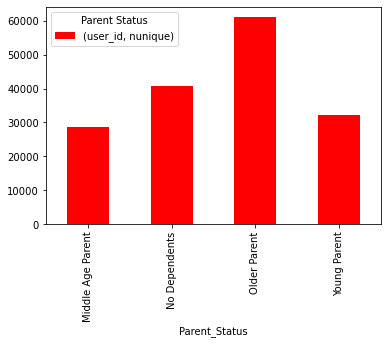

In [97]:
#Create Bar Chart for parent status

df_parent.plot.bar(color=['red'])
plt.legend(title='Parent Status')

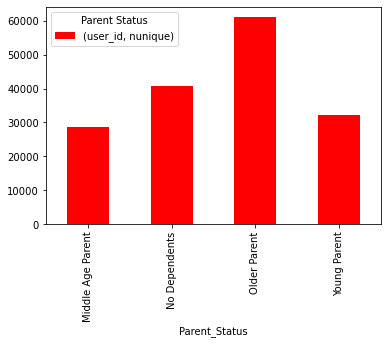

In [98]:
bar_parent_status = df_parent.plot.bar(color=['red'])
plt.legend(title='Parent Status')

In [99]:
#Export chart outside of jupyter in form of image file
bar_parent_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_parent_4_10.png'))

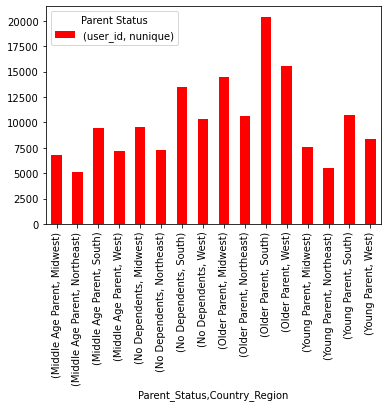

In [93]:
#Create Bar Chart for parent status & region

bar_parent_region = df_parent_region.plot.bar(color=['red','green','blue','orange'])
plt.legend(title='Parent Status')

In [103]:
#Export chart
bar_parent_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_parent_region_4_10.png'))

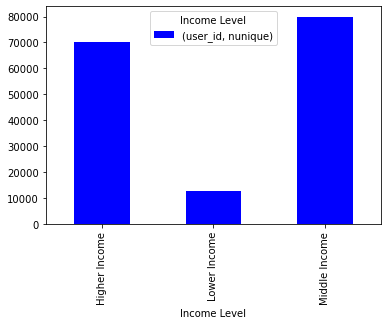

In [102]:
#Create Bar Chart for income status

bar_income = df_income.plot.bar(color=['blue'])
plt.legend(title='Income Level')

In [104]:
#Export Income Bar Chart

bar_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_4_10.png'))

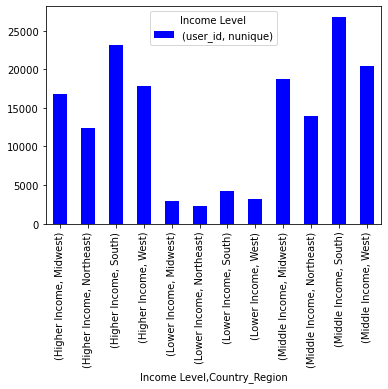

In [105]:
#Create Bar Chart for income status by region

bar_income_region = df_income_region.plot.bar(color=['blue'])
plt.legend(title='Income Level')

In [106]:
#Export Income & Region Bar Chart

bar_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_region_4_10.png'))

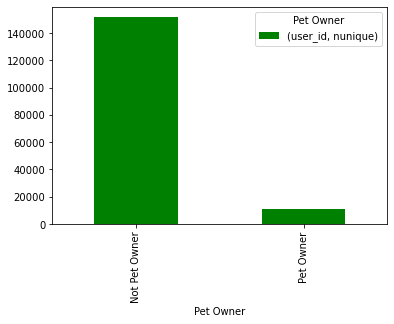

In [107]:
#Create Bar Chart for pet owner status

bar_pet = df_pet.plot.bar(color=['green'])
plt.legend(title='Pet Owner')

In [108]:
#Export Pet Bar chart

bar_pet.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_pet_owner.png'))

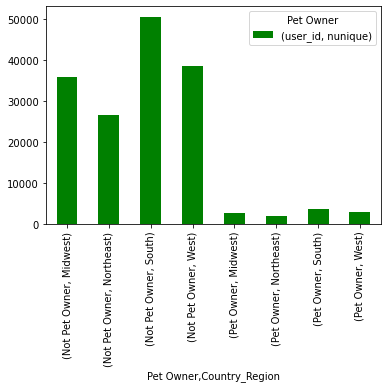

In [109]:
#Create Bar Chart for pet owner status & region

bar_pet_region = df_pet_region.plot.bar(color=['green'])
plt.legend(title='Pet Owner')

In [110]:
#Export Pet & Region Bar chart

bar_pet_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_pet_region.png'))

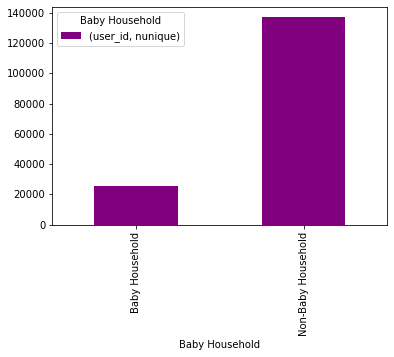

In [111]:
#Create baby household bar chart 

bar_baby = df_baby.plot.bar(color=['purple'])
plt.legend(title='Baby Household')

In [112]:
#Export baby household chart 

bar_baby.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_baby_household.png'))

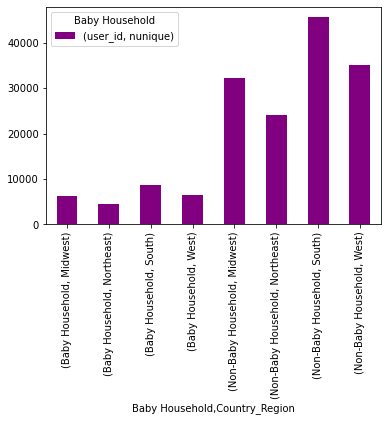

In [113]:
#Create Bar Chart for baby household & region

bar_baby_region = df_baby_region.plot.bar(color=['purple'])
plt.legend(title='Baby Household')

In [114]:
#Export baby household & region chart 

bar_baby_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_baby_household_region.png'))

## 08. Aggregate max, mean, & min
Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [116]:
# Parent categories shop at different hours of the day?

df_2.groupby('Parent_Status').agg({'order_hour_of_day':['max','min','mean','median']})

order_hour_of_day                      
                                max min       mean median
Parent_Status                                            
Middle Age Parent                23   0  13.380408     13
No Dependents                    23   0  13.364980     13
Older Parent                     23   0  13.363186     13
Young Parent                     23   0  13.340932     13

Looks like the hours in the day are consistent and similar so there is no differences

In [121]:
#Parent categories shop on different days of the week?

df_2.groupby('Parent_Status').agg({'order_day_of_the_week':['max','min','mean','median']})

order_day_of_the_week                     
                                    max min      mean median
Parent_Status                                               
Middle Age Parent                     6   0  2.748401      3
No Dependents                         6   0  2.741625      3
Older Parent                          6   0  2.753922      3
Young Parent                          6   0  2.744028      3

Looks like the days of the week are also consistent and similar so there is no differences

In [123]:
# do certain ages tend to be pet owners?

df_2.groupby('Pet Owner').agg({'Age':['mean','median','min', 'max']})

Age               
                    mean median min max
Pet Owner                              
Not Pet Owner  49.426917     49  18  81
Pet Owner      49.706814     50  18  81

Pet owners seem to also be similar in age 

In [125]:
#Is there a gender difference in placing orders fewer days apart? 

df_2.groupby('Gender').agg({'days_since_prior_order':['mean','median','min', 'max']})

days_since_prior_order                  
                         mean median  min   max
Gender                                         
Female               10.06388    7.0  0.0  30.0
Male                 10.10645    7.0  0.0  30.0

Does not seem to be a gender difference of how long it takes to place the next order

In [126]:
#Are there gender differences when placing orders at certain times of day? 

df_2.groupby('Gender').agg({'order_hour_of_day':['mean','median','min', 'max']})

order_hour_of_day               
                    mean median min max
Gender                                 
Female         13.361169     13   0  23
Male           13.363321     13   0  23

In [128]:
#Do higher spenders shop at different hours of the day?

df_2.groupby('spending_flag').agg({'order_hour_of_day':['mean','median','min', 'max']})

order_hour_of_day               
                           mean median min max
spending_flag                                 
High Spender          13.250476     13   0  23
Low Spender           13.364506     13   0  23

Does not seem to be much difference in hours in the day when purchasing for high and low spenders

In [129]:
#Do higher spenders shop on different days of the week?

df_2.groupby('spending_flag').agg({'order_day_of_the_week':['mean','median','min', 'max']})

order_day_of_the_week               
                               mean median min max
spending_flag                                     
High Spender               2.782392      3   0   6
Low Spender                2.747192      3   0   6

It seems like Higher and Lower Spenders are ordering around the same time each week, high spenders may be slightly later in the week. 

In [130]:
#Do pet owners tend to have higher incomes?

df_2.groupby('Pet Owner').agg({'income':['mean','median','min', 'max']})

income                      
                        mean median    min     max
Pet Owner                                         
Not Pet Owner   99250.013972  96506  25903  593901
Pet Owner      105210.999746  99649  26256  591089

In [131]:
#Do those with higher income levels order more frequently? 

df_2.groupby('Income Level').agg({'days_since_prior_order':['mean','median','min', 'max']})

days_since_prior_order                  
                                mean median  min   max
Income Level                                          
Higher Income              10.055777    7.0  0.0  30.0
Lower Income               10.467013    7.0  0.0  30.0
Middle Income              10.073430    7.0  0.0  30.0

Higher income seems to shop the most however, the middle income group is a close second. 

In [132]:
#Do households with babies place orders fewer days apart?

df_2.groupby('Baby Household').agg({'days_since_prior_order':['mean','median','min', 'max']})

days_since_prior_order                  
                                     mean median  min   max
Baby Household                                             
Baby Household                   8.671970    7.0  0.0  30.0
Non-Baby Household              10.751391    7.0  0.0  30.0

Yes it seems that households with baby(s) tend to shop more than households that do not have a baby(s)

## 09. Compare customer profiles with Regions & depts
Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [133]:
#Parent Status by Department

crosstab_parent_department = pd.crosstab(df_profile['department_id'],df_profile['Parent_Status'], dropna=False )
crosstab_parent_department 

Parent_Status,Middle Age Parent,No Dependents,Older Parent,Young Parent
department_id,,,,
1.0,288988,405513,608487,324626
2.0,4530,6935,10062,5639
3.0,156548,221599,329085,176098
4.0,1286585,1812885,2688302,1439319
5.0,18558,27959,38494,22961
6.0,35463,50038,72643,39756
7.0,356514,512055,766599,401279
8.0,12213,18250,27193,14455
9.0,112533,157414,236730,127048


In [135]:
crosstab_parent_department.to_clipboard()

Summary:
Older parents seem to buy the most in every department
Produce seems to be the most popular department that is purchased from with dairy eggs being second and snacks being the third. 
The least popular departments are other, missing and bulk
Every Parents category purchases from baby - could be expecting parents or purchasing for gifts.

In [136]:
#Income Level by Department

crosstab_income_department = pd.crosstab(df_profile['department_id'],df_profile['Income Level'], dropna=False )
crosstab_income_department 

Income Level,Higher Income,Lower Income,Middle Income
department_id,,,
1.0,762481,75687,789446
2.0,12518,1535,13113
3.0,417038,37613,428679
4.0,3377215,293668,3556208
5.0,52542,6052,49378
6.0,92806,7494,97600
7.0,894607,149568,992272
8.0,35242,3349,33520
9.0,304051,21237,308437


In [137]:
crosstab_income_department.to_clipboard()

Summary:
Seems like the Middle income spends the most accoss most of the departments, especially on Produce, dairy & eggs& snacks. 
The Lower income groups spends the most on snacks, produce, dairy & eggs. 
High income spends the most on Produce, dairy & eggs, & beverages.
Across all incomes, the least spent is in bulk, missing and other departments. 



In [138]:
#Pet Owner by Department

crosstab_pet_department = pd.crosstab(df_profile['department_id'],df_profile['Pet Owner'], dropna=False )
crosstab_pet_department 

Pet Owner,Not Pet Owner,Pet Owner
department_id,,
1.0,1418385,209229
2.0,23146,4020
3.0,778259,105071
4.0,6634401,592690
5.0,87851,20121
6.0,174523,23377
7.0,1792923,243524
8.0,0,72111
9.0,558284,75441


In [139]:
crosstab_pet_department.to_clipboard()

Summary:Pet owners smallest purchases are in the bulk dept, international, alcohol and baby depts. Non-pet owners smallest amount of purchases are in the alcohol & household depts. 


In [140]:
#Baby Household by Department

crosstab_baby_department = pd.crosstab(df_profile['department_id'],df_profile['Baby Household'], dropna=False )
crosstab_baby_department

Baby Household,Baby Household,Non-Baby Household
department_id,,
1.0,530363,1097251
2.0,8964,18202
3.0,290303,593027
4.0,2249054,4978037
5.0,15903,92069
6.0,59661,138239
7.0,516211,1520236
8.0,18240,53871
9.0,229047,404678


In [141]:
crosstab_baby_department.to_clipboard()

Summary:Seems like there are a lot more non baby households than there are with baby. Seems like the same departments have the most purchases of produce, dairy & eggs, & snacks.
Baby households smallest amount of purchases is in the alcohol dept. Non-baby households in comparision purchase a lot more alcohol. 

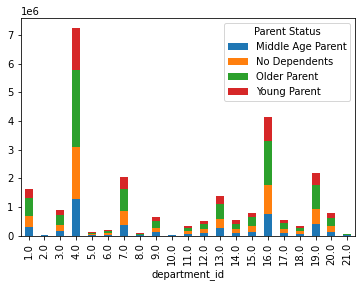

In [142]:
#Parent Status & Department Stacked Bar

parent_department_stacked_bar = crosstab_parent_department.plot.bar(stacked= True)
plt.legend(title='Parent Status')

In [143]:
#Export bar chart 

parent_department_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'parent_department_stacked_bar.png'))

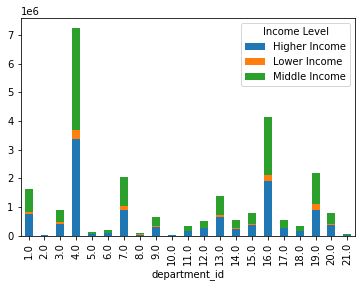

In [144]:
#Income Level & Department Stacked Bar

income_department_stacked_bar = crosstab_income_department.plot.bar(stacked= True)
plt.legend(title='Income Level')

In [145]:
#Export bar chart 

income_department_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_department_stacked_bar.png'))

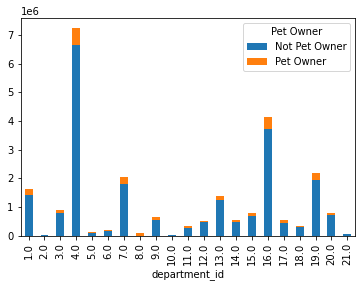

In [146]:
#Pet Owner & Department Stacked Bar

pet_department_stacked_bar = crosstab_pet_department.plot.bar(stacked= True)
plt.legend(title='Pet Owner')

In [147]:
#Export bar chart 

pet_department_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pet_department_stacked_bar.png'))

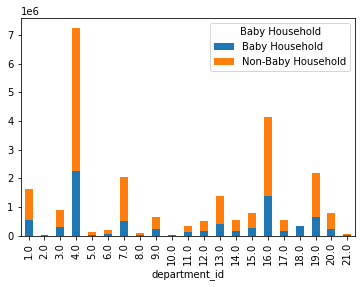

In [148]:
#Baby Household & Department Stacked Bar

baby_department_stacked_bar = crosstab_baby_department.plot.bar(stacked= True)
plt.legend(title='Baby Household')

In [158]:
#Export bar chart 

baby_department_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'baby_department_stacked_bar.png'))

In [152]:
#Dept by Region

crosstab_department_region = pd.crosstab(df_profile['department_id'],df_profile['Country_Region'], dropna=False )
crosstab_department_region

Country_Region,Midwest,Northeast,South,West
department_id,,,,
1.0,381094,283259,545809,417452
2.0,6284,4932,9200,6750
3.0,205374,157635,292772,227549
4.0,1695851,1269360,2409221,1852659
5.0,25567,18534,36253,27618
6.0,46607,34491,65417,51385
7.0,472243,367868,680594,515742
8.0,16481,14080,23012,18538
9.0,148529,110708,210680,163808


In [153]:
crosstab_department_region.to_clipboard()

Summary:
The South shows that it has the most purchases. The most popular departments also are produce, dairy & eggs, snacks and beverages which is consistent with other profiles in the same departments. 

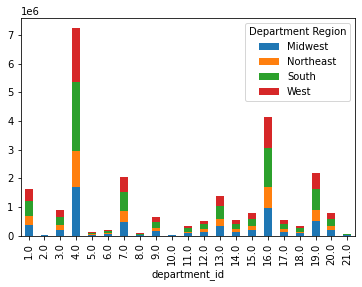

In [154]:
#Baby Household & Department Stacked Bar

department_region_stacked_bar = crosstab_department_region.plot.bar(stacked= True)
plt.legend(title='Department Region')

In [157]:
#Export bar chart 

department_region_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_region_stacked_bar.png'))

In [94]:
#marriage status by department

crosstab_department_marriage = pd.crosstab(df_profile['department_id'],df_profile['marriage_status'], dropna=False )
crosstab_department_marriage

KeyError: 'marriage_status'